In [132]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix, accuracy_score

In [133]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.857143,1211,24,63,6,6,0
1,0.250000,313,101,173,48,0,0
2,0.411765,247,51,382,50,4,0
3,0.611111,41,3,36,5,0,0
4,0.600000,12341,770,1417,0,8,1


In [134]:
# Independent attributes
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [135]:
#split dataset in features and target variable
X = dataset[features] # Features
y = dataset.label # Target variable

In [136]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% training and 40% test

In [138]:
number_of_splits=5
X = np.array(dataset[features]) # Features
y = np.array(dataset.label)
kf = KFold(n_splits=number_of_splits)
kf.get_n_splits(X)

print(kf)

recall_avg=0
precision_avg=0
fmeasure_avg=0
accuracy_avg=0

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(min_impurity_decrease=0.001)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_predict = clf.predict(X_test)

    ## Perormance evaluation of the Model

    #true negatives is C(0,0), false negatives is C(1,0), false positives is C(0,1) and true positives is C(1,1) 
    conf_matrix = confusion_matrix(y_test, y_predict)

    #true_negative
    TN = conf_matrix[0][0]
    #false_negative
    FN = conf_matrix[1][0]
    #false_positive
    FP = conf_matrix[0][1]
    #true_positive
    TP = conf_matrix[1][1]

    # Recall is the ratio of the total number of correctly classified positive examples divided by the total number of positive examples. 
    # High Recall indicates the class is correctly recognized (small number of FN)
    recall = (TP)/(TP + FN)
    recall_avg += recall
    # Precision is the the total number of correctly classified positive examples divided by the total number of predicted positive examples. 
    # High Precision indicates an example labeled as positive is indeed positive (small number of FP)
    precision = (TP)/(TP + FP)
    precision_avg += precision
    
    fmeasure = (2*recall*precision)/(recall+precision)
    fmeasure_avg += fmeasure
    
    accuracy = (TP + TN)/(TN + FN + FP + TP)
    accuracy_avg += accuracy
    #accuracy_score(y_test, y_predict)
    print("------ CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ "\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )

    
recall_avg=recall_avg/number_of_splits
precision_avg=precision_avg/number_of_splits
fmeasure_avg=fmeasure_avg/number_of_splits
accuracy_avg=accuracy_avg/number_of_splits

print("\n\n\n------ AVERAGE CLASSIFICATION PERFORMANCE OF DECISION TREE MODEL ------ "\
      "\n Recall : ", (recall*100) ,"%" \
      "\n Precision : ", (precision*100) ,"%" \
      "\n Accuracy : ", (accuracy*100) ,"%" \
      "\n F-measure : ", (fmeasure*100) ,"%" )


KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1389 1390 1391 ... 6942 6943 6944] TEST: [   0    1    2 ... 1386 1387 1388]
------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ 
 Recall :  97.26224783861672 %
 Precision :  97.68451519536903 %
 Accuracy :  97.4802015838733 %
 F-measure :  97.47292418772562 %
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [1389 1390 1391 ... 2775 2776 2777]
------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ 
 Recall :  98.42857142857143 %
 Precision :  96.76966292134831 %
 Accuracy :  97.55219582433405 %
 F-measure :  97.59206798866855 %
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [2778 2779 2780 ... 4164 4165 4166]
------ CLASSIFICATION PERFORMANCE OF K-NEAREST-NEIGHBORS MODEL ------ 
 Recall :  97.39884393063583 %
 Precision :  97.96511627906976 %
 Accuracy :  97.69618430525558 %
 F-measure :  97.68115942028986 %
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [4167 4168 4169 ... 5553 5554 5555]


In [ ]:
from sklearn.tree
import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('twitter.png')
Image(graph.create_png())

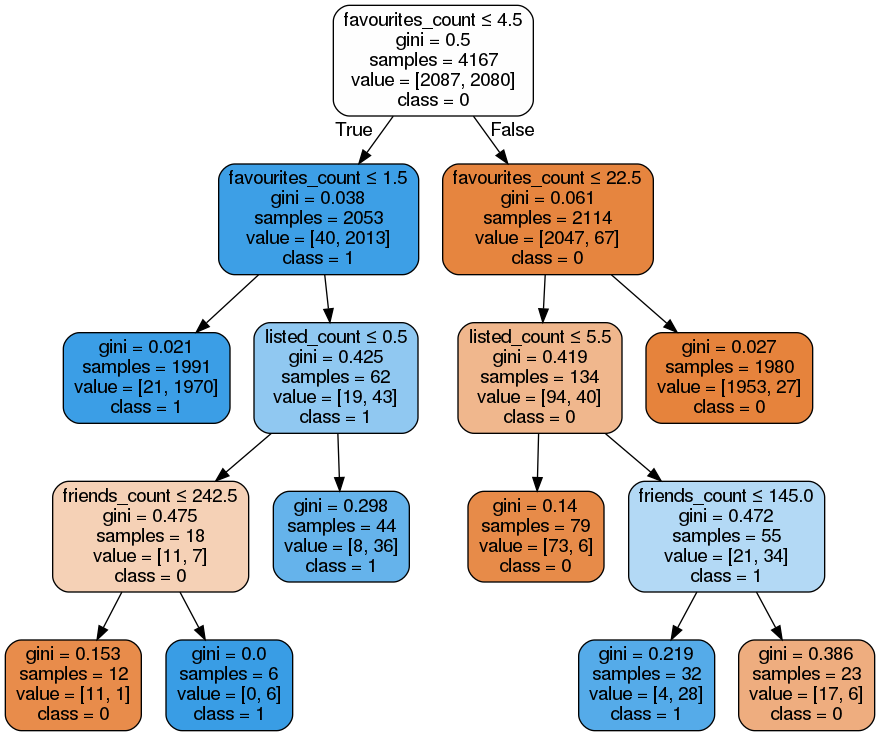

In [131]:
from sklearn.model_selection import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4])
X = np.array(dataset[features]) # Features
y = np.array(dataset.label)
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [1389 1390 1391 ... 6942 6943 6944] TEST: [   0    1    2 ... 1386 1387 1388]
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [1389 1390 1391 ... 2775 2776 2777]
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [2778 2779 2780 ... 4164 4165 4166]
TRAIN: [   0    1    2 ... 6942 6943 6944] TEST: [4167 4168 4169 ... 5553 5554 5555]
TRAIN: [   0    1    2 ... 5553 5554 5555] TEST: [5556 5557 5558 ... 6942 6943 6944]
